In [1]:
import numpy as np
import pickle
from visualization import *
from run_exp import *

In [ ]:
!pip install pulp
!pip install joblib
import pulp

In [3]:
# k_track, log_track, dist_track, sigma_x, accuracies = run_exp(iter=3)
# k_track, log_track, dist_track, sigma_x, accuracies = run_exp(iter=3, sample="full")
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

In [2]:
from datetime import date
today = date.today().strftime("%m%d%y")

run = 50
it = 50
a = 30
samp = "Z" # "B"
dnew = "w" # "r"
path = "output/exp_result/sampleZ_worst/" + today + "_r" + str(run) + "_it" + str(it) + "_a" + str(a) + "/"

import os
if not os.path.exists(path):
    os.makedirs(path)

In [ ]:
from joblib import Parallel, delayed
Parallel(n_jobs=3)(delayed(run_exp)(sample=samp, iter=it, file_name= path+str(i+1), draw=dnew, alpha=a) for i in range(run))

In [3]:
# load results
n = 50
path = "output/exp_result/sampleZ_worst/031220_r50_it50_a15/031220_r50_it50_a15"

results = []
for i in range(1,n+1):
    results.append(pickle.load(open(path+str(i), 'rb')))

## plot - K v.s. loglike
compare the grows of log-likelihood with K (feature-counts) for 50 iterations.


0


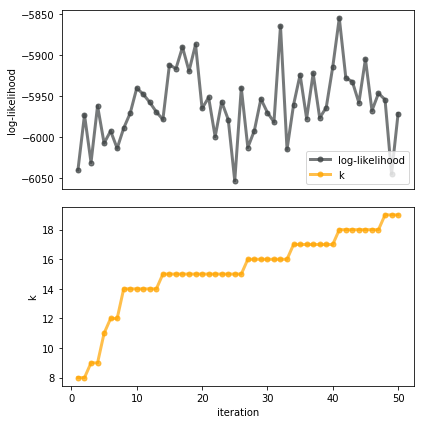

1


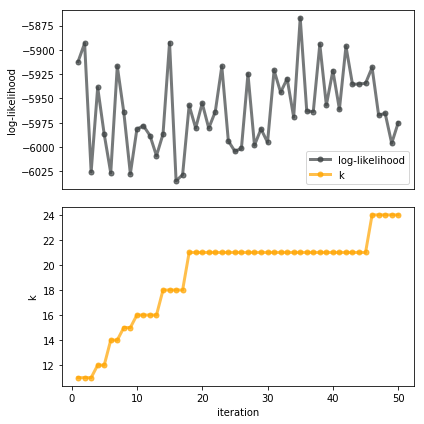

2


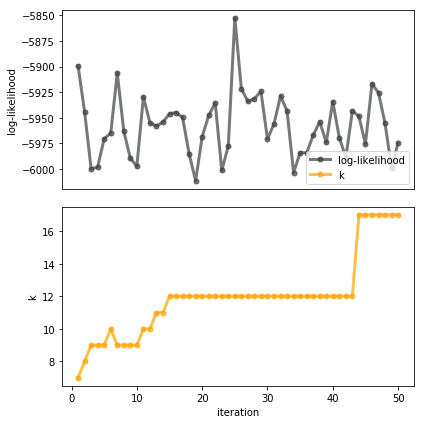

3


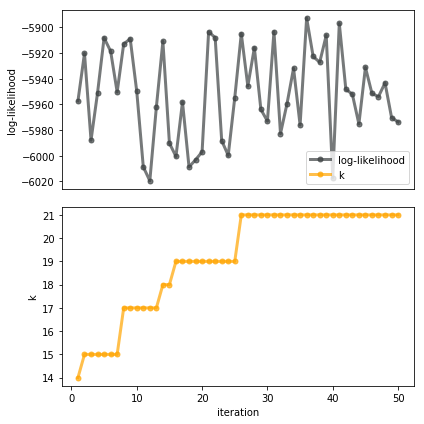

4


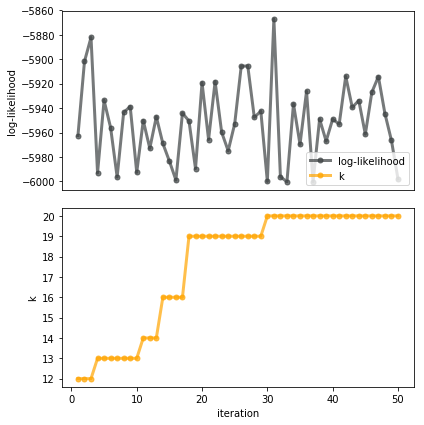

5


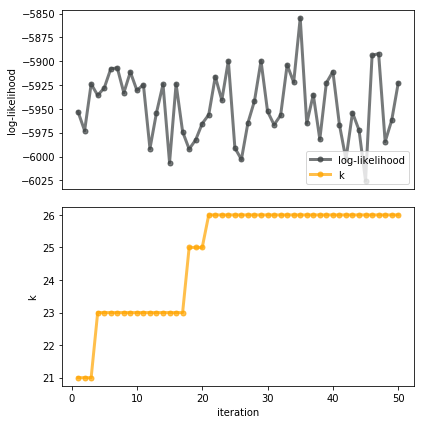

6


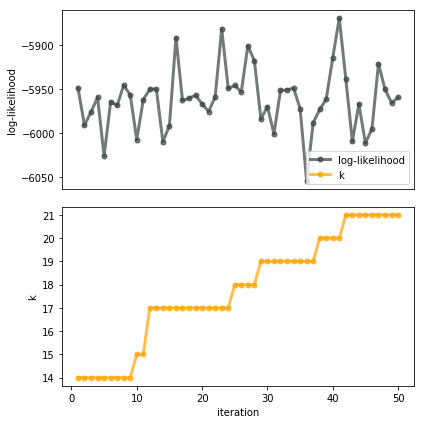

7


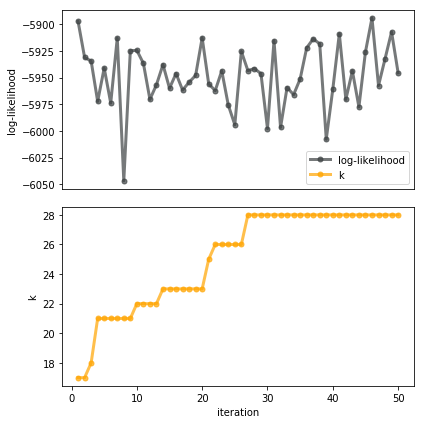

8


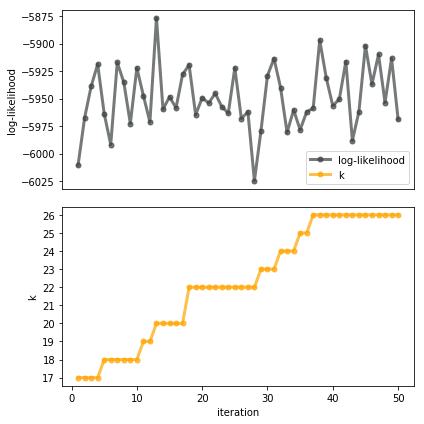

9


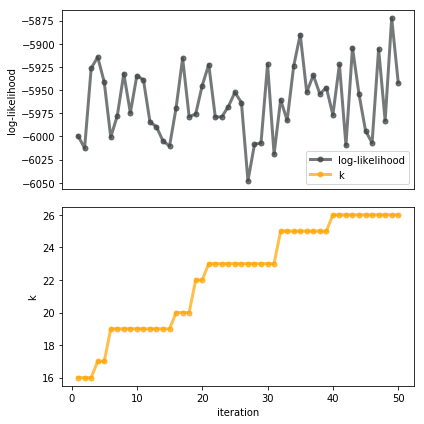

10


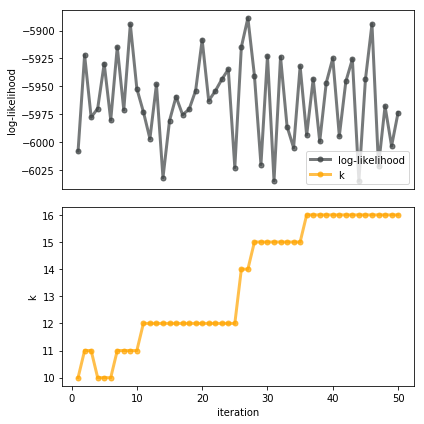

11


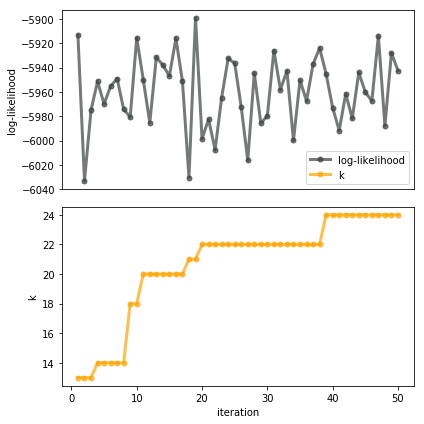

12


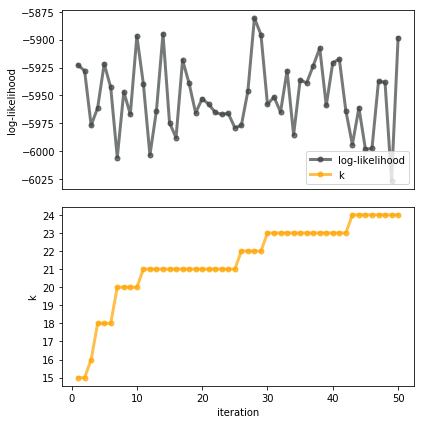

13


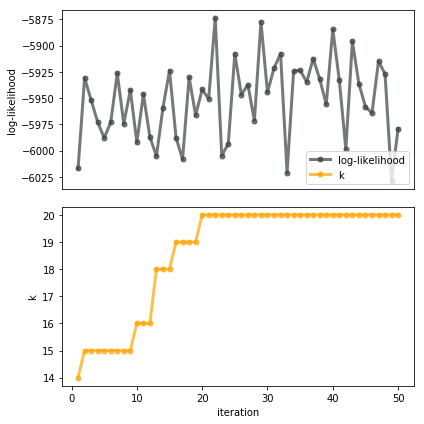

14


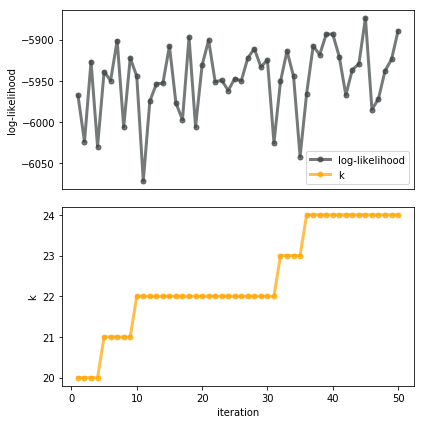

15


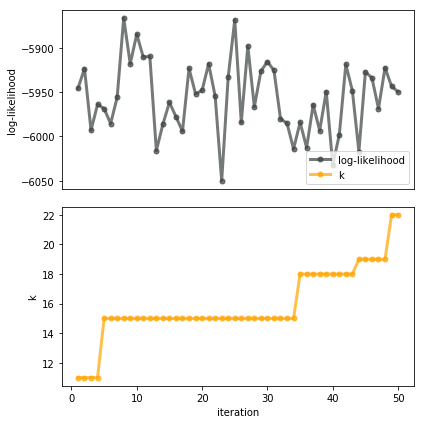

16


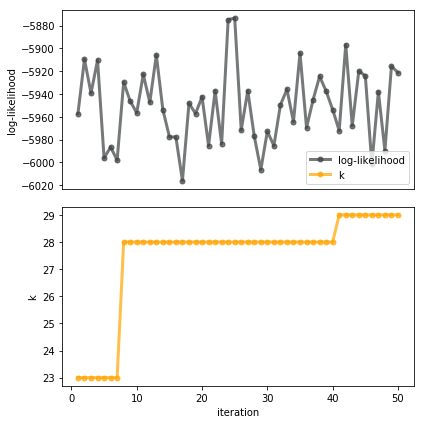

17


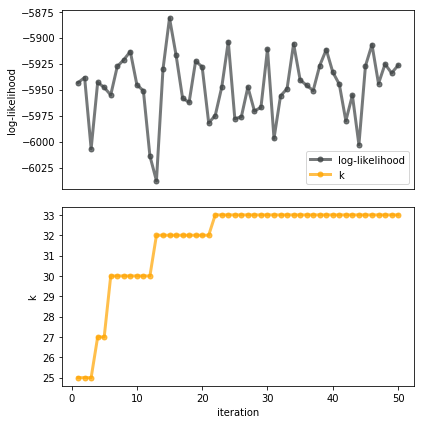

18


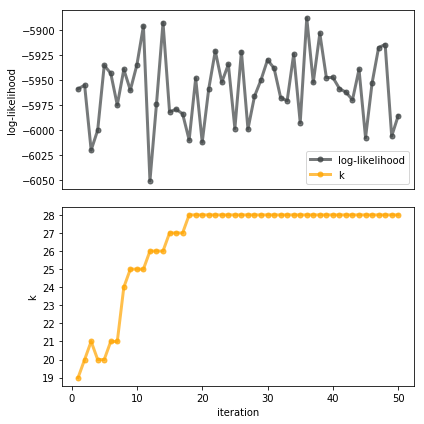

19


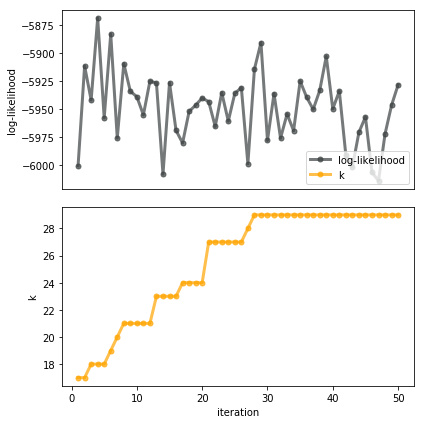

20


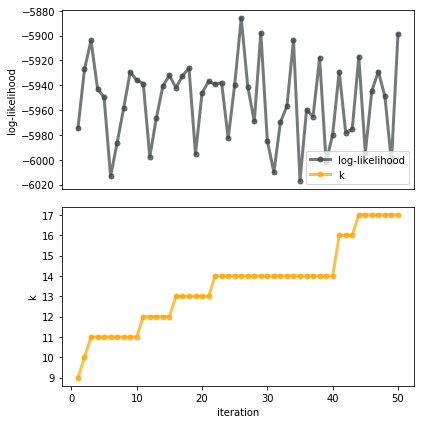

21


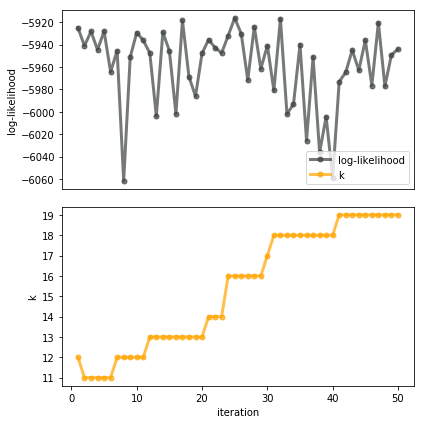

22


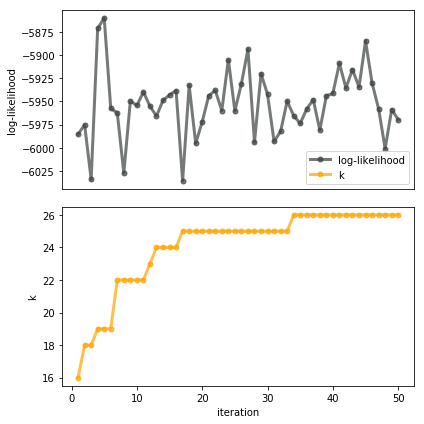

23


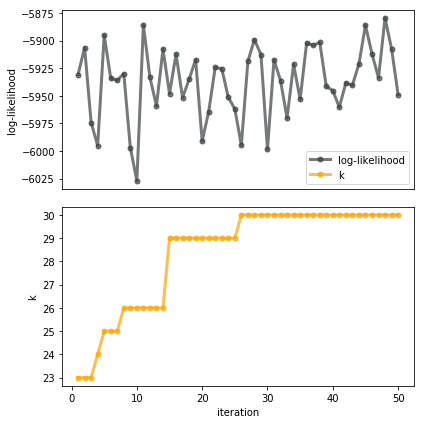

24


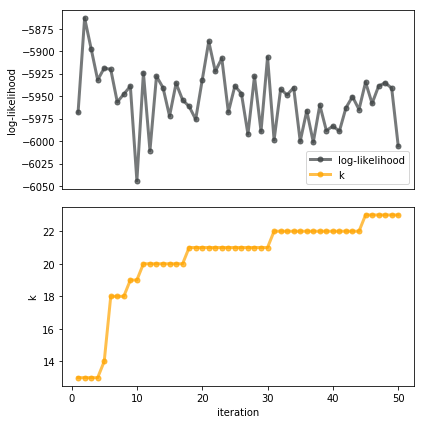

25


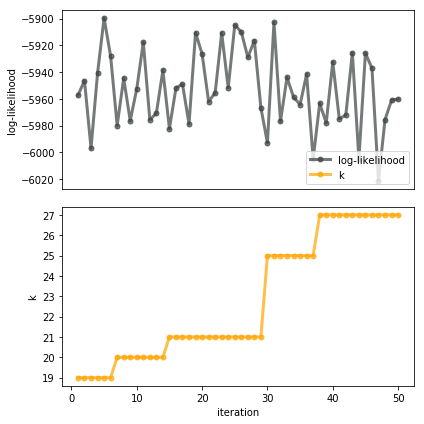

26


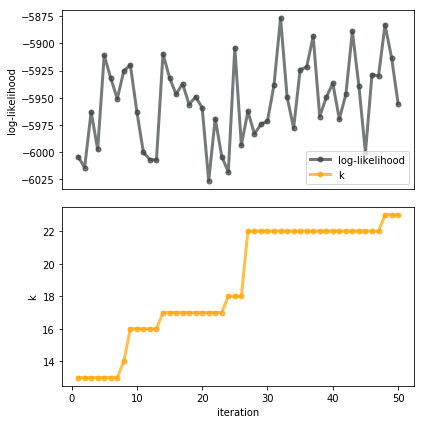

27


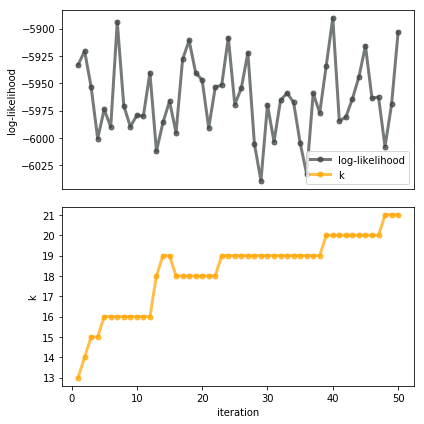

28


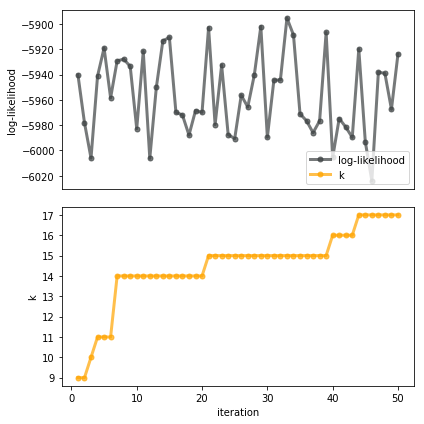

29


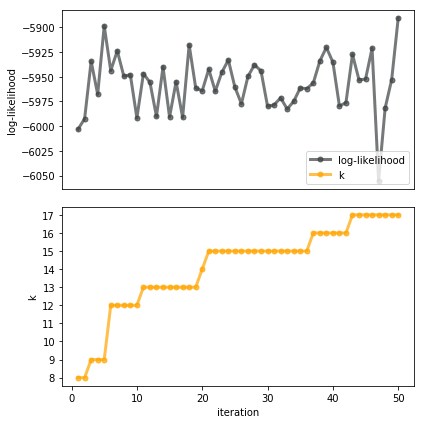

30


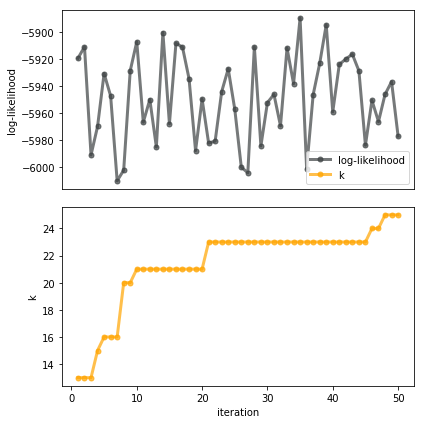

31


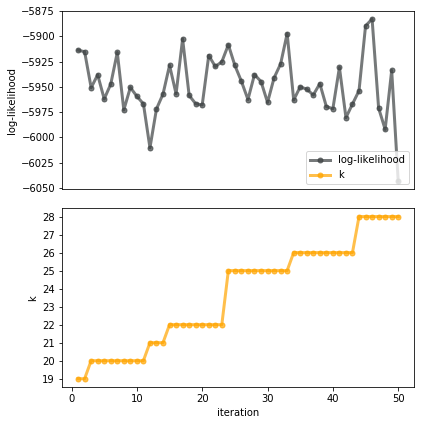

32


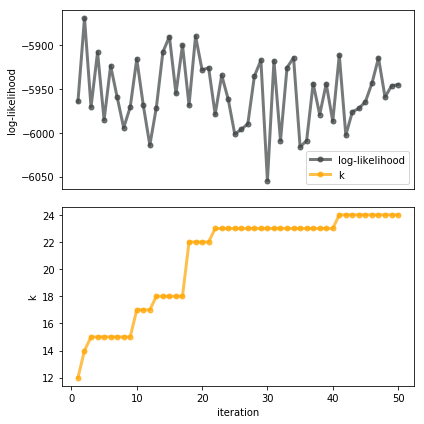

33


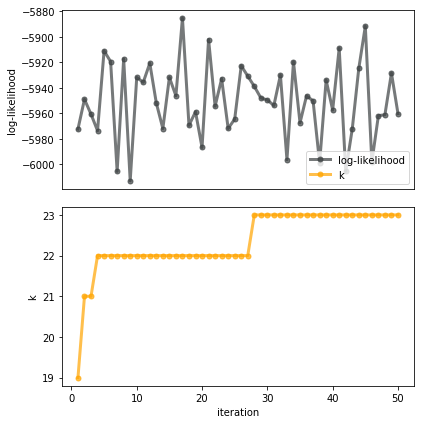

34


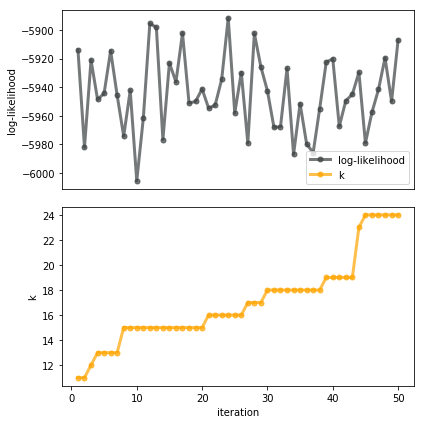

35


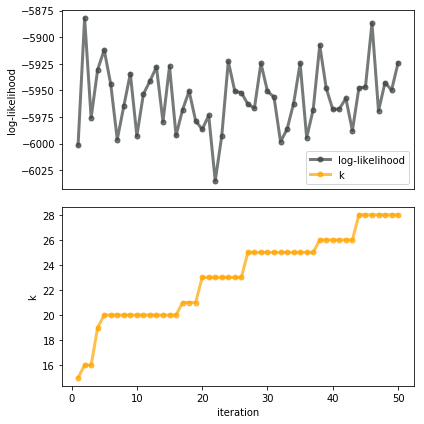

36


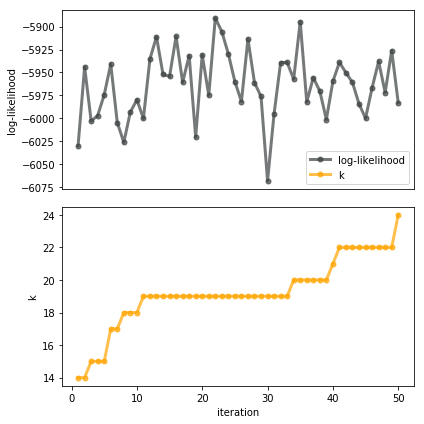

37


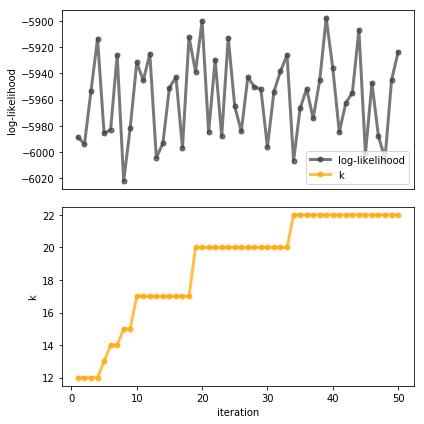

38


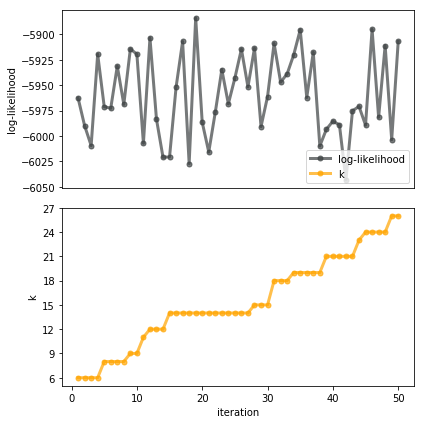

39


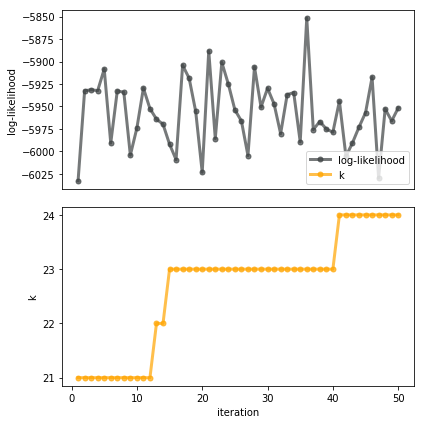

40


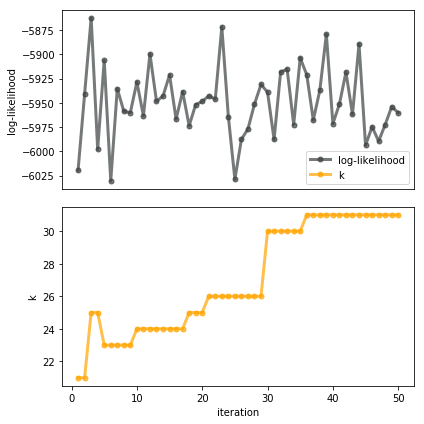

41


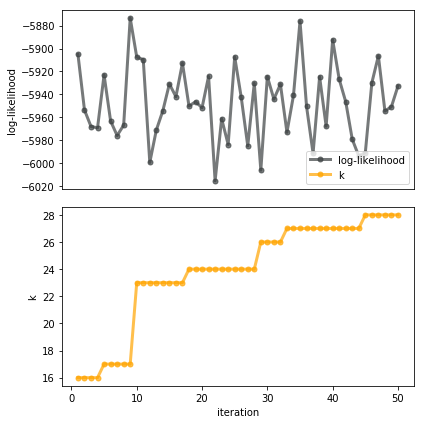

42


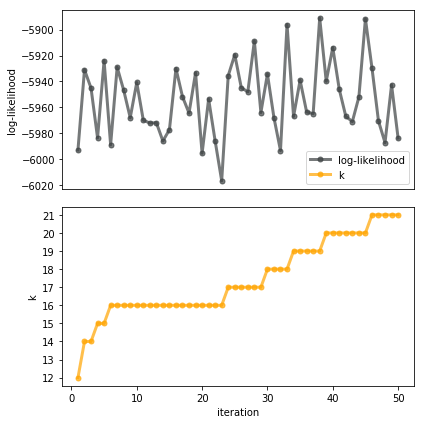

43


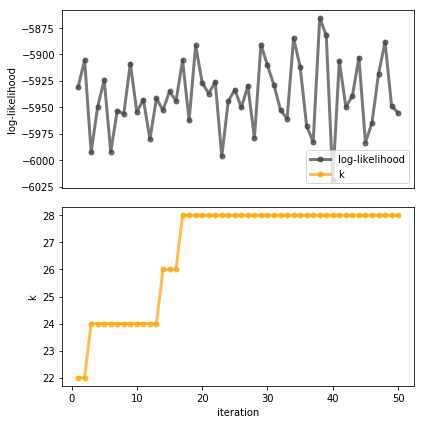

44


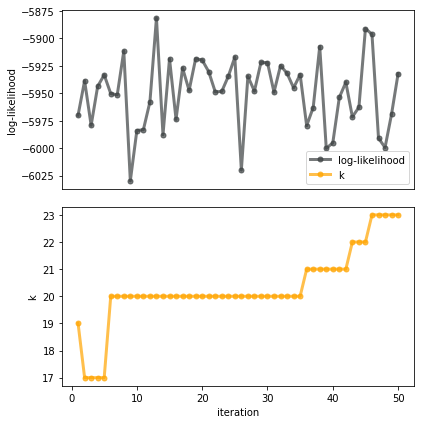

45


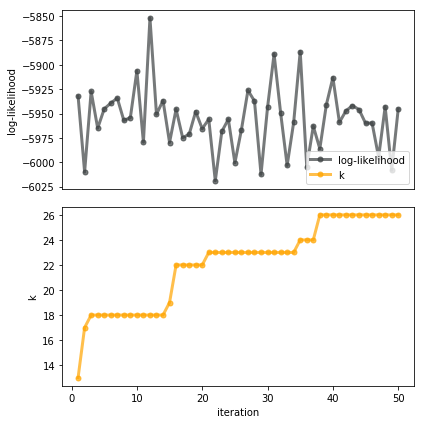

46


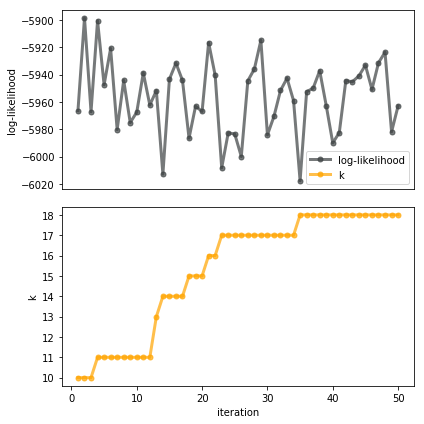

47


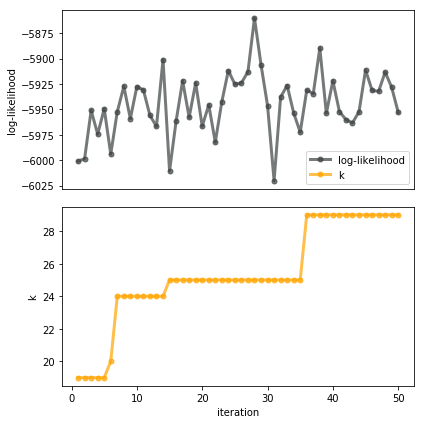

48


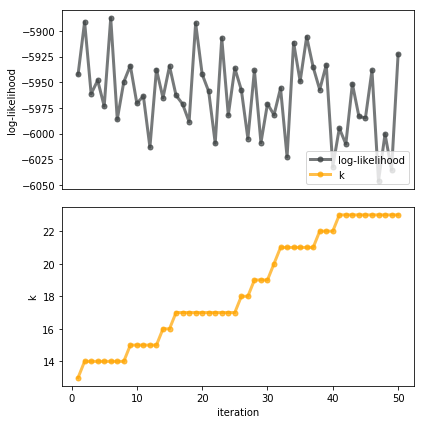

49


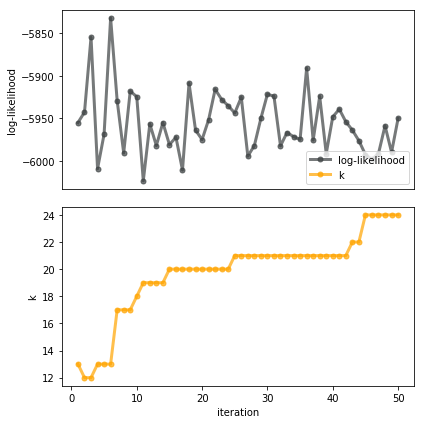

In [5]:
for i in range(n):
    print(i)
    plot_curve(results[i]['log_track'], results[i]['k_track'])

## Summarize in one plot

Take all previous results, and take the mean of all runs for each iteration.
Add std as error, to see how it differs.

In [4]:
log_all = [results[i]['log_track'] for i in range(it)]
k_all = [results[i]['k_track'] for i in range(it)]

log_mean = np.mean(log_all, axis=0)
k_mean = np.mean(k_all, axis=0)
log_std = np.std(log_all, axis=0)
k_std = np.std(k_all, axis=0)

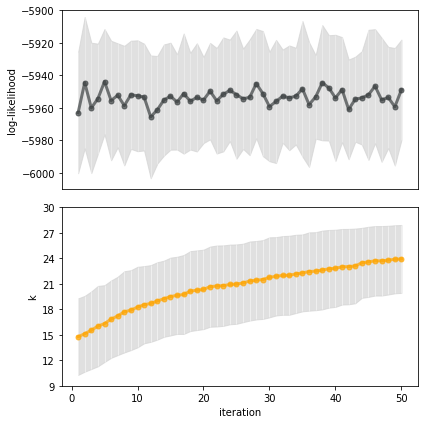

In [7]:
plot_curve(log_mean, k_mean, log_std, k_std, saveFile=True, fileName="plot-Zworst", c1_lh=[-6010,-5900], c2_lh=[9,30])

## plot log-likelihood v.s. accuracy

compare the grows of log-likelihood with accuracy for 50 iterations.

In [8]:
# loglike V.S. accuracy
log_all = [results[i]['log_track'] for i in range(n)]
acc_all = [[results[j]['accuracies'][i][0] for i in range(it)] for j in range(n)]

log_mean = np.mean(log_all, axis=0)
acc_mean = np.mean(acc_all, axis=0)
log_std = np.std(log_all, axis=0)
acc_std = np.std(acc_all, axis=0)

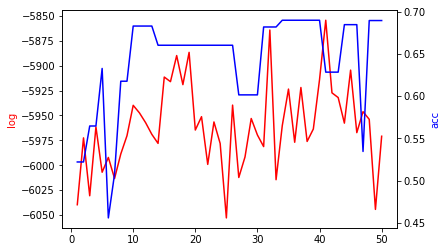

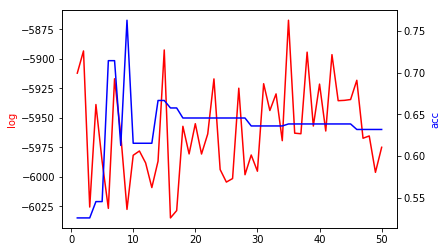

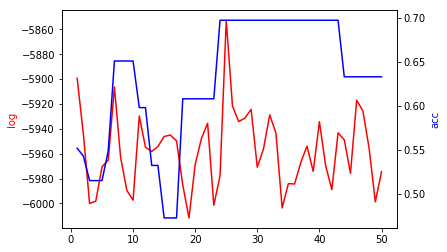

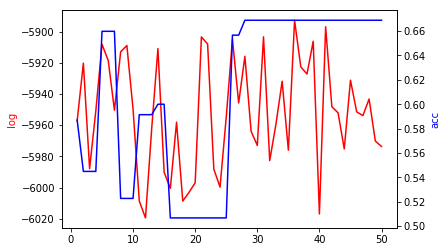

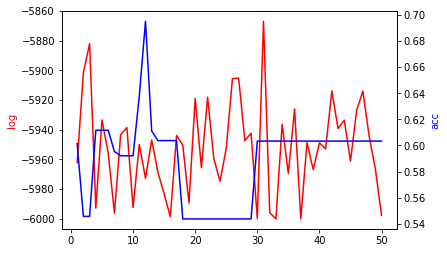

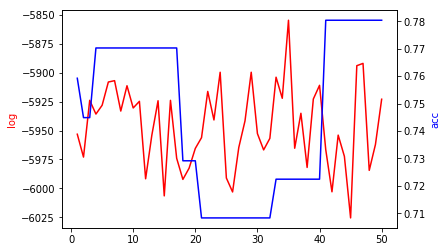

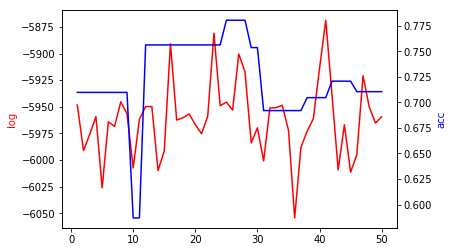

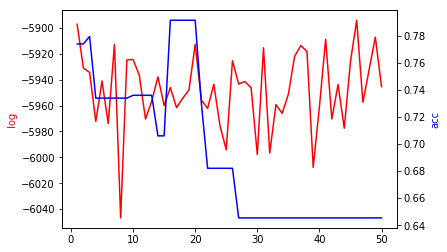

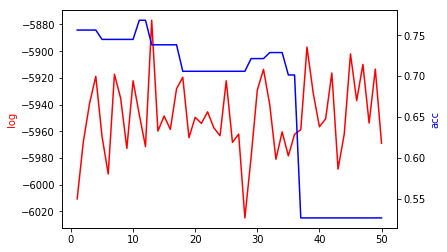

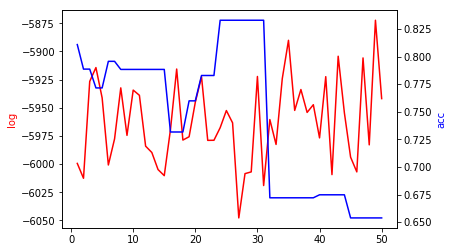

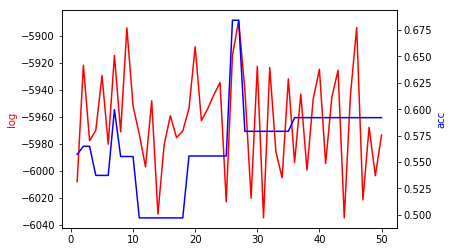

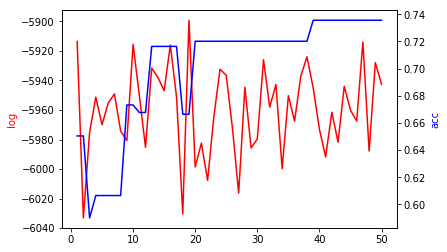

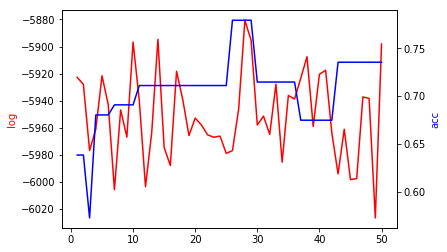

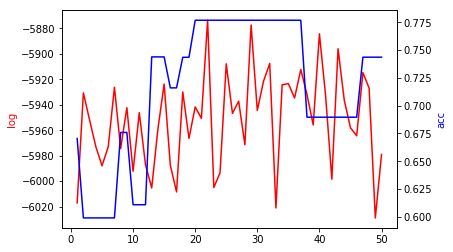

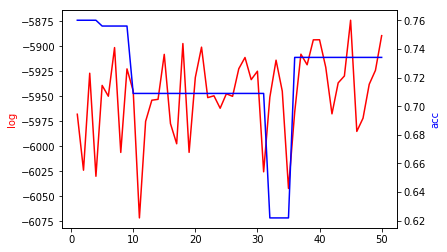

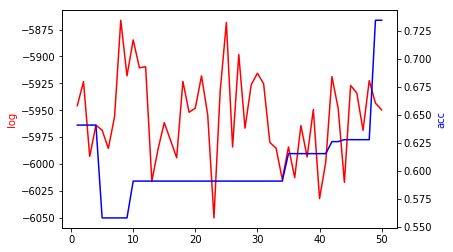

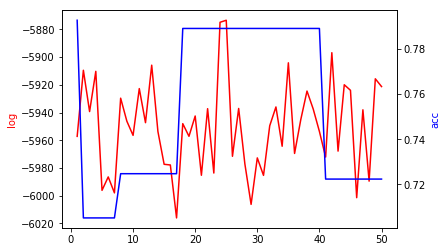

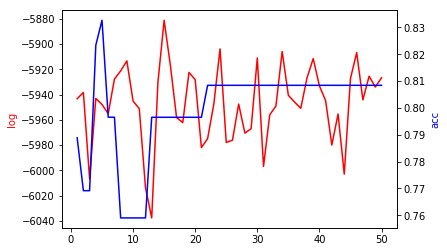

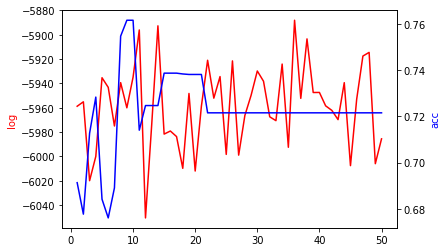

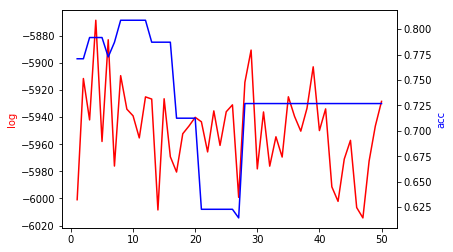

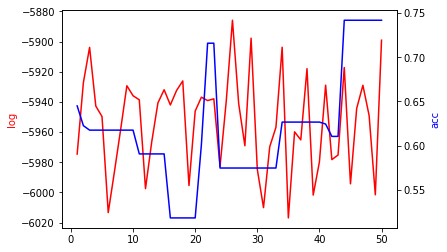

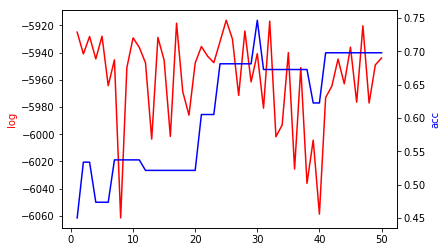

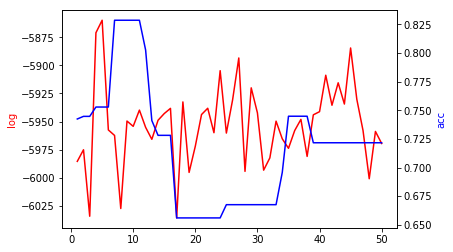

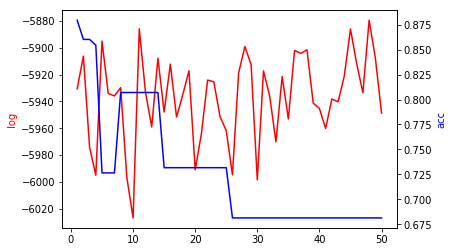

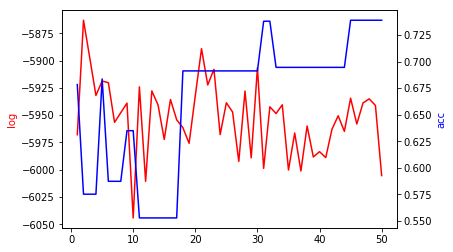

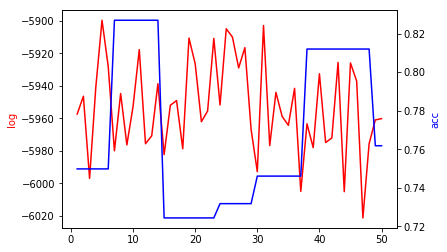

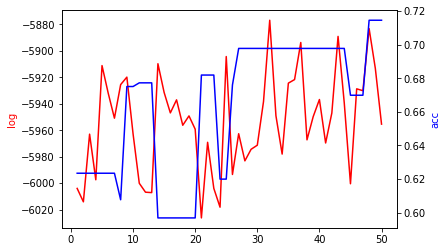

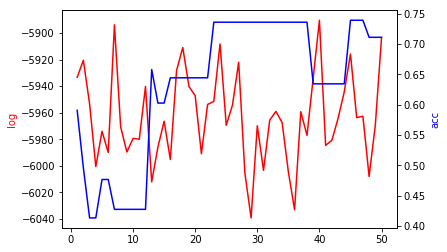

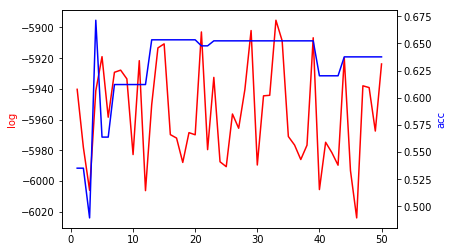

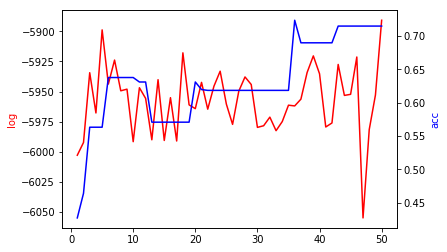

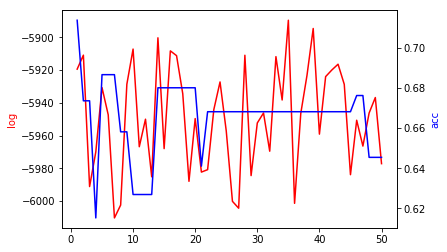

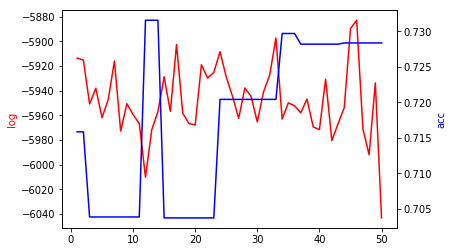

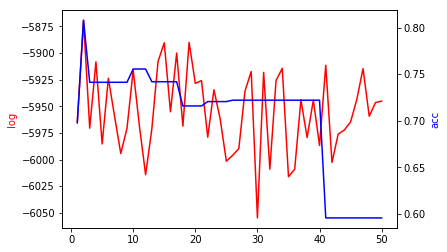

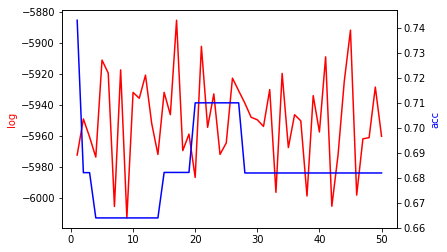

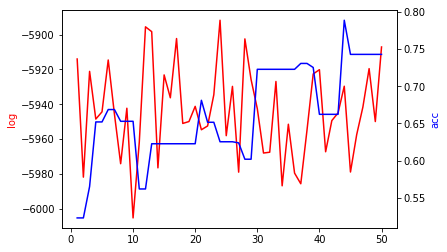

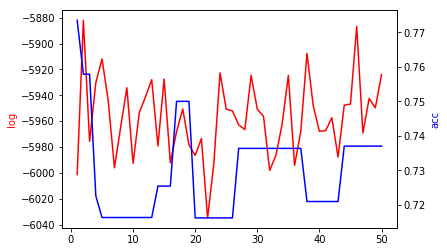

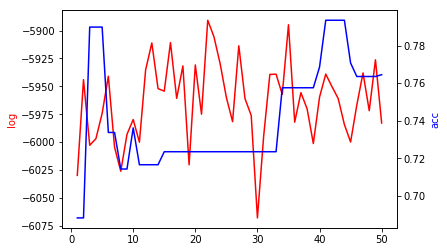

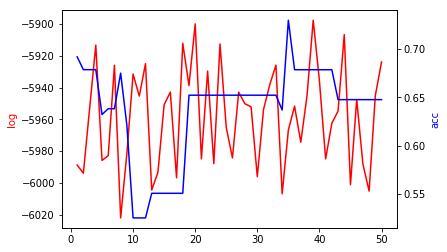

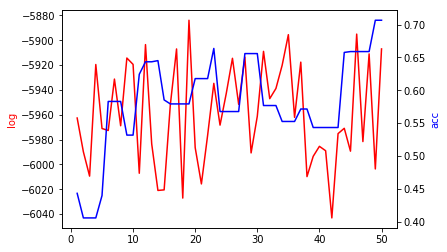

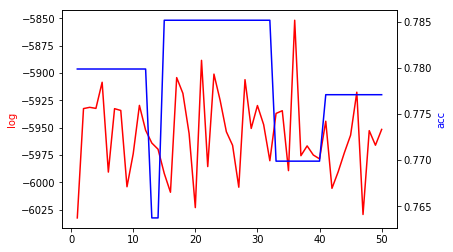

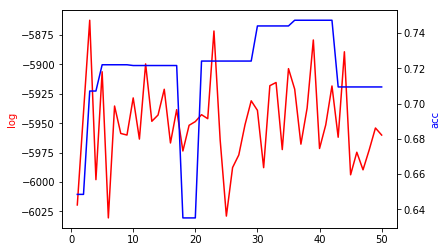

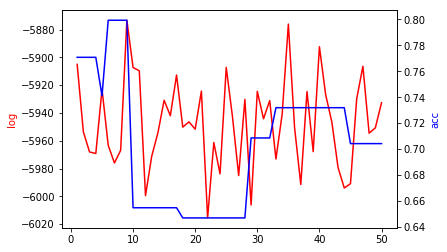

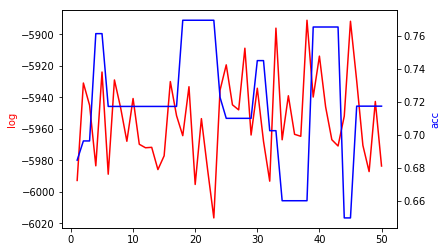

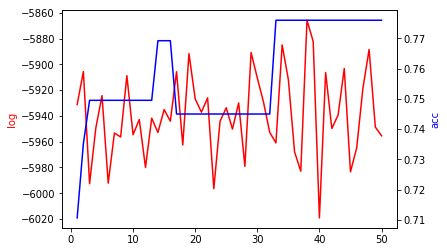

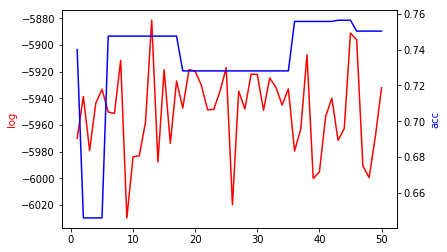

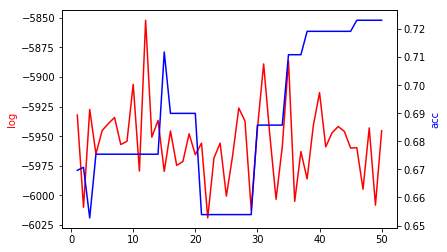

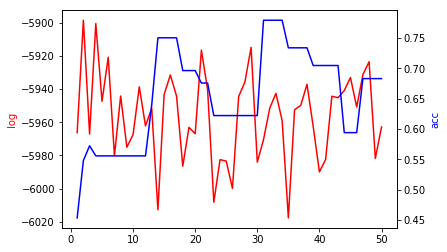

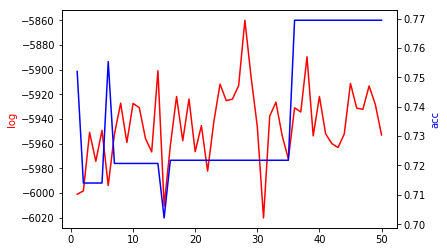

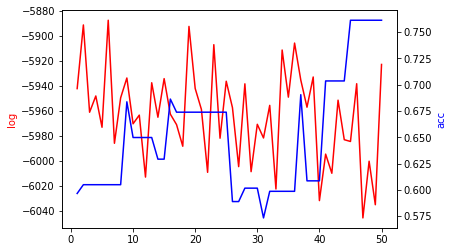

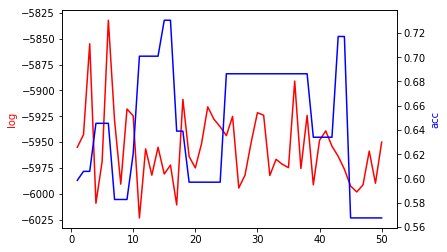

In [9]:
for i in range(n):
    index = [i for i in range(1,51)]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(index, log_all[i], 'r-')
    ax1.set_ylabel('log', color='r')
    ax1.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(index, acc_all[i], 'b-')
    ax2.set_ylabel('acc', color='b')
    ax2.grid(False)

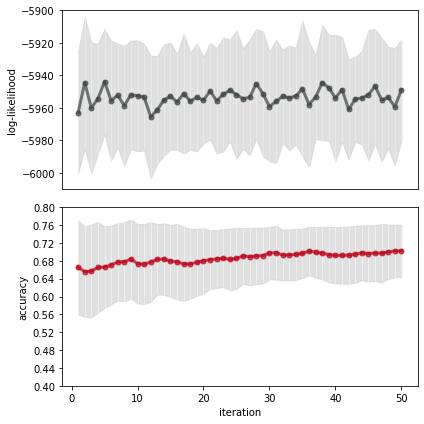

In [11]:
plot_curve2(log_mean, acc_mean, log_std, acc_std, saveFile=True, fileName="plot-Zworst_acc", c1_lh=[-6010,-5900], c2_lh=[0.4,0.8])

In [11]:
print([results[i]['best_model']['best_iter'] for i in range(n)])
[results[i]['best_model']['best_accuracies'] for i in range(n)]

[47, 8, 23, 27, 11, 40, 24, 15, 10, 23, 25, 38, 25, 19, 0, 48, 0, 4, 8, 7, 43, 29, 6, 0, 44, 6, 47, 44, 12, 35, 0, 36, 1, 0, 43, 0, 40, 34, 48, 14, 29, 5, 17, 32, 42, 45, 30, 35, 44, 14]


[(0.6893833333333333, 0.6879),
 (0.7628166666666667, 0.7608),
 (0.6973166666666667, 0.6983),
 (0.6689, 0.6629),
 (0.6951166666666667, 0.6993),
 (0.7804, 0.7798),
 (0.7803166666666667, 0.7792),
 (0.7914666666666667, 0.7885),
 (0.7683, 0.766),
 (0.8329166666666666, 0.8336),
 (0.6842166666666667, 0.6853),
 (0.7356166666666667, 0.7314),
 (0.7793166666666667, 0.7747),
 (0.7768166666666667, 0.7699),
 (0.7600666666666667, 0.7606),
 (0.7343666666666666, 0.7327),
 (0.7926666666666666, 0.7946),
 (0.8326833333333333, 0.833),
 (0.76165, 0.7601),
 (0.8087333333333333, 0.8091),
 (0.7418, 0.7429),
 (0.74665, 0.7463),
 (0.8286833333333333, 0.8244),
 (0.8793833333333333, 0.8794),
 (0.7388166666666667, 0.7321),
 (0.8268833333333333, 0.8292),
 (0.7144333333333334, 0.71),
 (0.7393333333333333, 0.7355),
 (0.6533833333333333, 0.6667),
 (0.7234, 0.7189),
 (0.7138666666666666, 0.7128),
 (0.7281833333333333, 0.7357),
 (0.8078166666666666, 0.8085),
 (0.7430333333333333, 0.7374),
 (0.78865, 0.7861),
 (0.77346666

In [8]:
all_best = [results[i]['best_model']['best_accuracies'][0] for i in range(n)]
all_iter = [results[i]['best_model']['best_iter'] for i in range(n)]
all_k = [results[i]['best_model']['best_k'] for i in range(n)]
best = np.argmax(all_best)
best_result = results[best]['best_model']
best_it = best_result['best_iter']
best_acc = best_result['best_accuracies'][0]
best_features = best_result['best_features']
best_k = best_result['best_k']


In [9]:
print("The best result is in run {}, iteration {}, with accuracy {} (K = {})".format(best, best_it, best_acc, best_k))
print("avg acc: {}".format(np.mean(all_best)))
print("avg iter: {}".format(np.mean(all_iter)))
print("avg k: {}".format(np.mean(all_k)))

The best result is in run 23, iteration 0, with accuracy 0.8793833333333333 (K = 23)
avg acc: 0.7580910000000002
avg iter: 23.54
avg k: 20.66


## plot best features

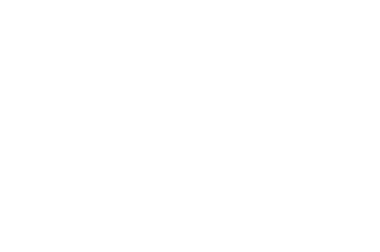

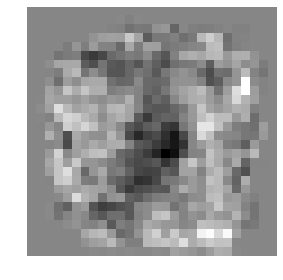

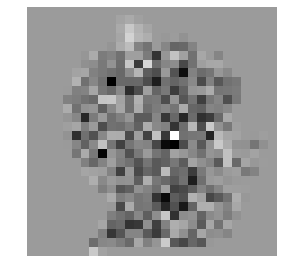

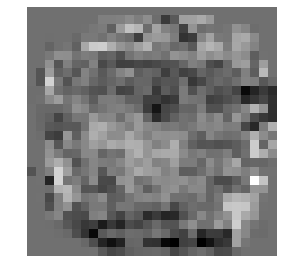

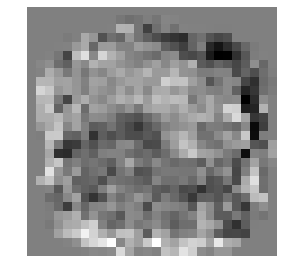

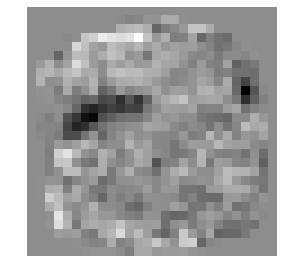

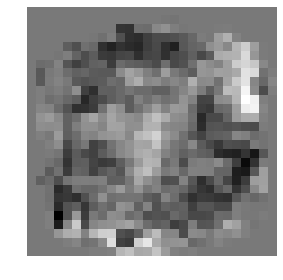

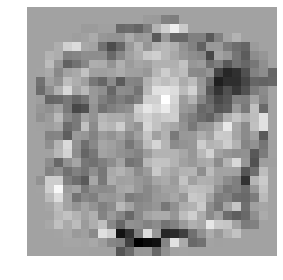

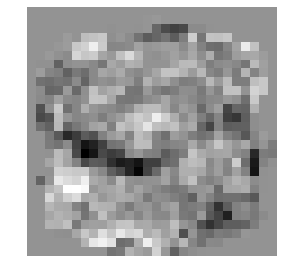

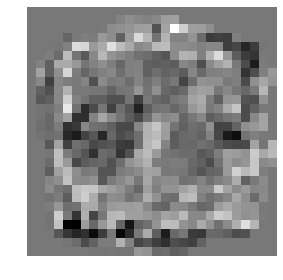

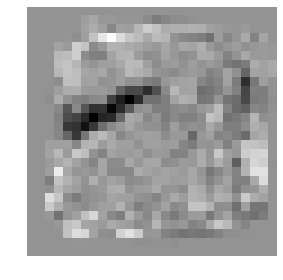

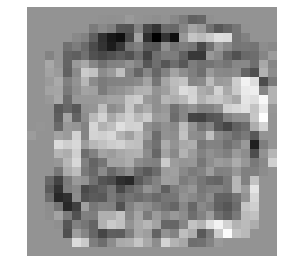

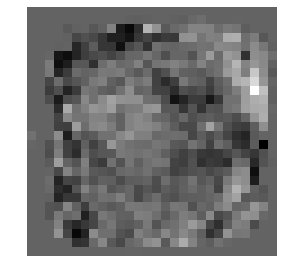

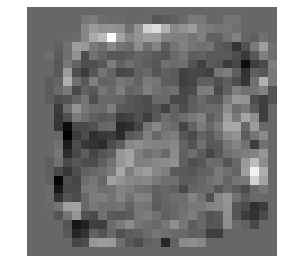

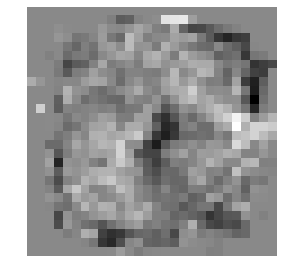

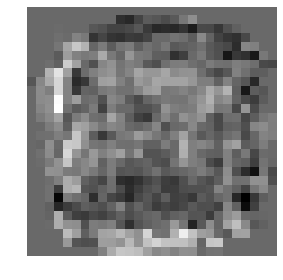

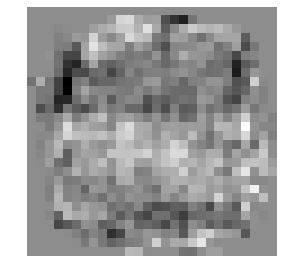

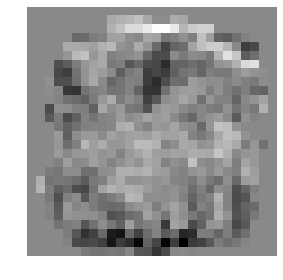

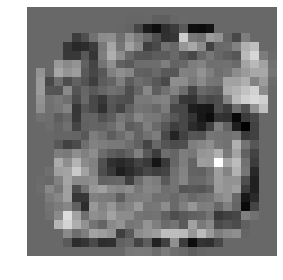

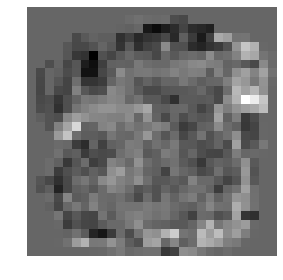

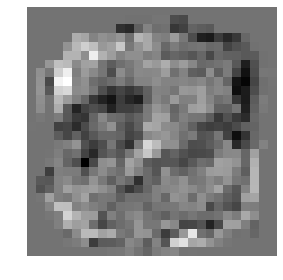

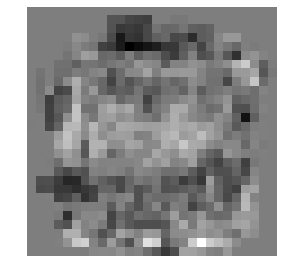

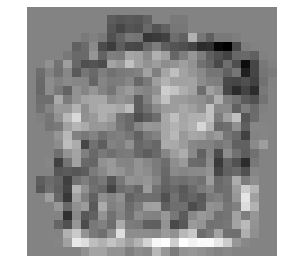

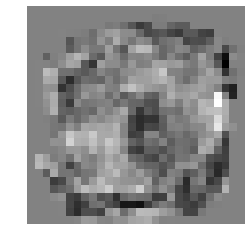

In [14]:
prep_features = prep_group(best_features)
plot_all(prep_features)